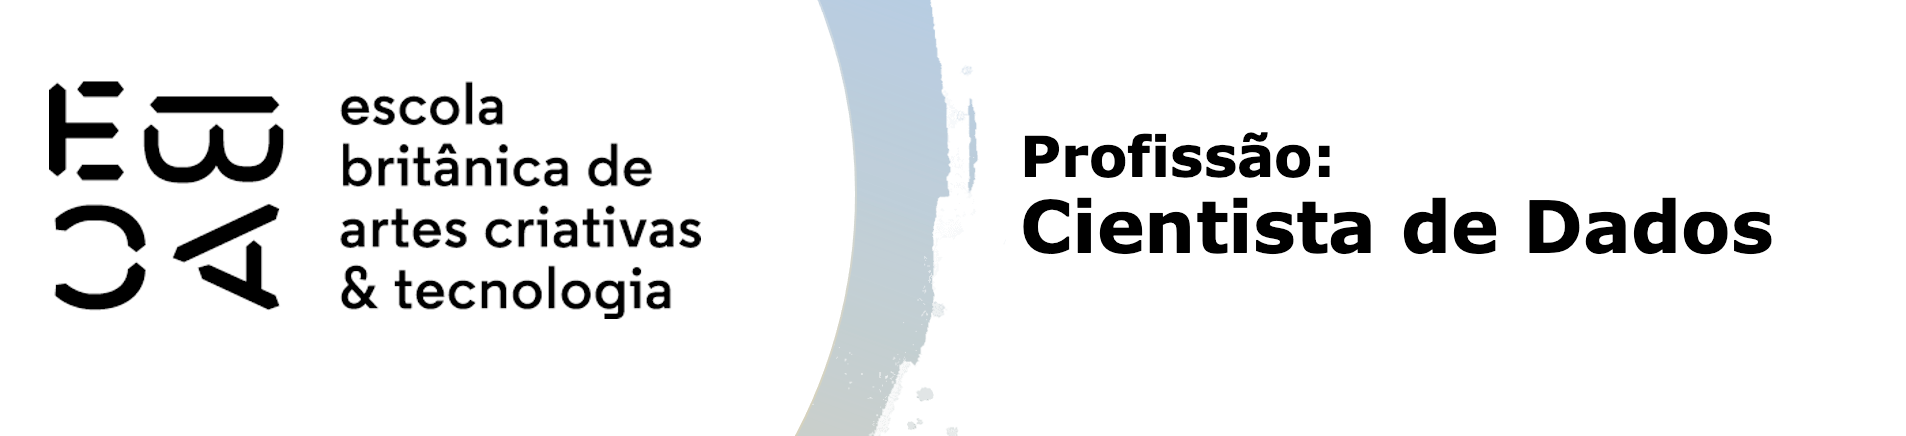

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


In [11]:
print("Colunas disponíveis:", df.columns)

Colunas disponíveis: Index(['CNPJ emit.', 'Emitente', 'No.', 'Data Emissão', 'Valor NF',
       'Data Registro', 'Créditos', 'Situação do Crédito', 'Ano', 'Semestre',
       'Retorno', 'flag_credito', 'categoria'],
      dtype='object')


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

C:\Users\shinoki\AppData\Local\Temp\ipykernel_9444\3622996224.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['retorno_positivo'] = df_filtrado['Retorno'] > 0


      categoria  Proporção Retorno > 0
0     Alimentos               0.681584
1    Auto posto               0.250000
2    Construção               0.468810
3      Farmácia               0.351556
4       Mercado               0.478155
5  Restaurantes               0.746214
6        Varejo               0.138373
7     Vestuário               0.230729
8  não definido               0.363394


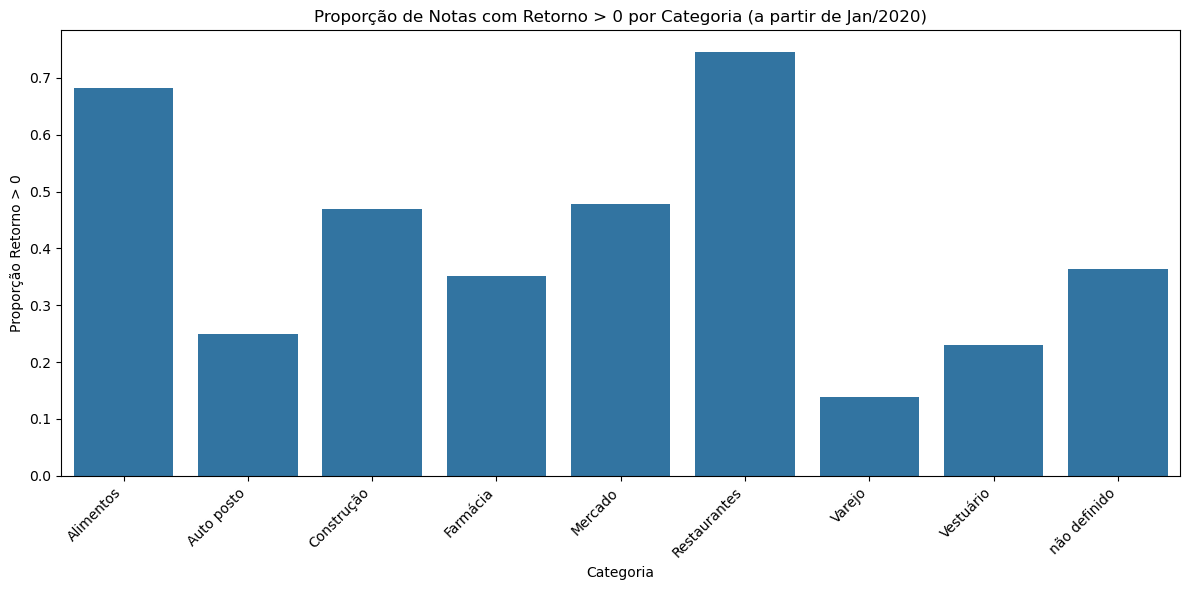

In [12]:
df['Data Emissão'] = pd.to_datetime(df['Data Emissão'], errors='coerce')

df_filtrado = df[df['Data Emissão'] >= '2020-01-01']

df_filtrado['retorno_positivo'] = df_filtrado['Retorno'] > 0

prop_retornos = df_filtrado.groupby('categoria')['retorno_positivo'].mean().reset_index()

prop_retornos = prop_retornos.rename(columns={'retorno_positivo': 'Proporção Retorno > 0'})

print(prop_retornos)

plt.figure(figsize=(12,6))
sns.barplot(data=prop_retornos, x='categoria', y='Proporção Retorno > 0')
plt.xticks(rotation=45, ha='right')
plt.title('Proporção de Notas com Retorno > 0 por Categoria (a partir de Jan/2020)')
plt.ylabel('Proporção Retorno > 0')
plt.xlabel('Categoria')
plt.tight_layout()
plt.show()

## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

C:\Users\shinoki\AppData\Local\Temp\ipykernel_9444\3457778210.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['evento'] = (df_filtrado['Retorno'] > 0).astype(int)


              prop_event  prop_non_event       WOE
categoria                                         
Alimentos       0.092234        0.032395  1.046342
Auto posto      0.003618        0.008159 -0.813331
Construção      0.201592        0.171723  0.160360
Farmácia        0.095986        0.133104 -0.326928
Mercado         0.353100        0.289718  0.197846
Restaurantes    0.043571        0.011141  1.363801
Varejo          0.018785        0.087937 -1.543585
Vestuário       0.011871        0.029755 -0.918918
não definido    0.179243        0.236069 -0.275381


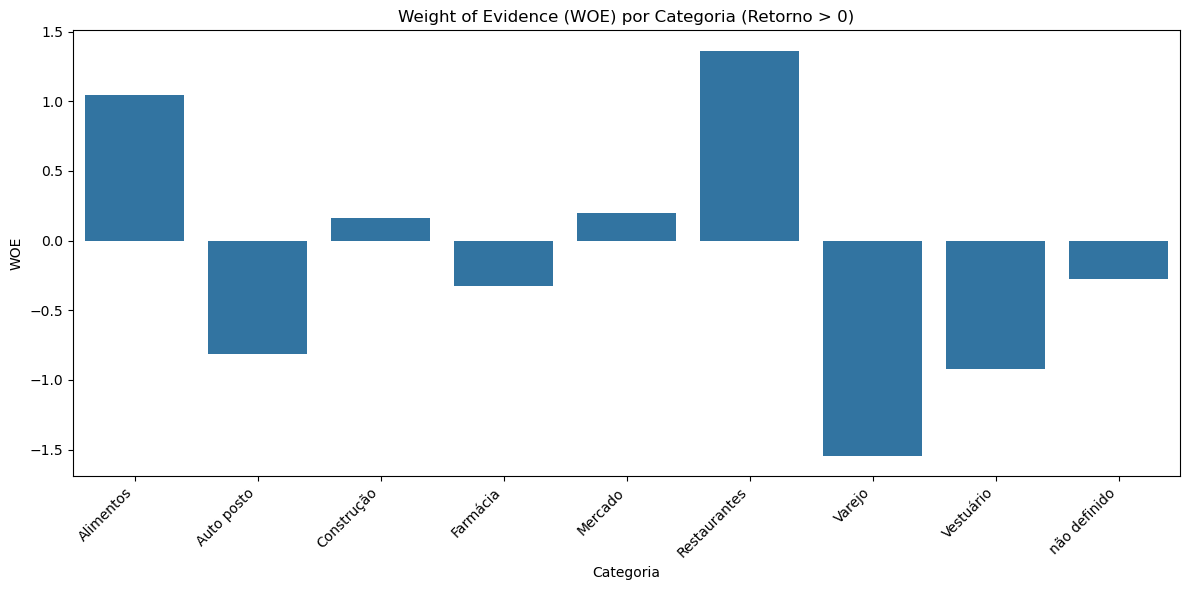

In [14]:
df['Data Emissão'] = pd.to_datetime(df['Data Emissão'], errors='coerce')
df_filtrado = df[df['Data Emissão'] >= '2020-01-01']

df_filtrado['evento'] = (df_filtrado['Retorno'] > 0).astype(int)

df_woe = df_filtrado.groupby('categoria')['evento'].agg(['sum', 'count'])
df_woe['non_event'] = df_woe['count'] - df_woe['sum']

total_event = df_woe['sum'].sum()
total_non_event = df_woe['non_event'].sum()

df_woe['prop_event'] = df_woe['sum'] / total_event
df_woe['prop_non_event'] = df_woe['non_event'] / total_non_event

df_woe['prop_event'] = df_woe['prop_event'].replace(0, 0.0001)
df_woe['prop_non_event'] = df_woe['prop_non_event'].replace(0, 0.0001)

df_woe['WOE'] = np.log(df_woe['prop_event'] / df_woe['prop_non_event'])

print(df_woe[['prop_event', 'prop_non_event', 'WOE']])

plt.figure(figsize=(12,6))
sns.barplot(x=df_woe.index, y=df_woe['WOE'])
plt.xticks(rotation=45, ha='right')
plt.title('Weight of Evidence (WOE) por Categoria (Retorno > 0)')
plt.ylabel('WOE')
plt.xlabel('Categoria')
plt.tight_layout()
plt.show()

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [15]:
df_woe['IV_component'] = (df_woe['prop_event'] - df_woe['prop_non_event']) * df_woe['WOE']

IV = df_woe['IV_component'].sum()

print(f'Information Value (IV) da variável categoria: {IV:.4f}')


Information Value (IV) da variável categoria: 0.2788


## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


In [ ]:
#A análise do IV mostrou que a variável "categoria" tem um poder razoável para ajudar a prever se uma nota fiscal terá retorno positivo. Com um IV de aproximadamente 0,28, essa variável tem uma influência média a forte na capacidade de distinguir notas que geram créditos.

#O WOE indicou que algumas categorias, como "Restaurantes" e "Alimentos", estão mais associadas a notas que geram crédito, ou seja, nessas categorias as chances de retorno positivo são maiores. Por outro lado, categorias como "Varejo", "Auto posto" e "Vestuário" têm menos chance de gerar crédito, apresentando valores negativos no WOE.

#Portanto, a categoria do estabelecimento é uma informação relevante e pode ser usada para ajudar a identificar quais notas têm maior probabilidade de retorno positivo no programa da Nota Fiscal Paulista.